In [1]:
import pandas as pd
import datetime
import warnings

#!pip install geotext
from geotext import GeoText
# we will need the another tool to interact with Geotext
from collections import OrderedDict


warnings.filterwarnings('ignore')

1. Introduction
2. Data Description:
    1. Twitter Data
        1. Columns we will be using
        2. Limitations of the data
    2. Covid Global data
        1. Columns we will be using
        2. Limitations of the data
    3. Ethical Consideration
3. Data Preperation, Cleaning and Manipulation:
4. Exploratory Data Analysis (EDA):
    1. Tweeter User Demographics
        1. New User Resigistraion Date (pre-covid user vs post covid user)
        2. Tweet by country and unique user in that country
    2. Sentiment
        1. overal sentiment, pos-neu-neg-compound
        2. Dig in
            1. sentiment over time in the US, consider vaccine valiable date and mandate date, also home test kit avaliable time
                1. by city
                2. by political mapping
            2. sentiment exclue the US, what are the diffference?
6. Correlation Analysis:
    1. mention home test self-report

## 1. Introduction

As the pandemic has impacted the globe for 3 years and continued to reach repetitive peaks in different regions, epidemics and corresponding preventive measures have become the center of discussion and concerns to modern society. While previously it was much difficult to collect adequate reactions to vaccines across different communities at one place, twitter allows us to access expressed sentiments from a variety of communities.


With that comes various opinions about the vaccine, and many choose to be vocal about their ideas on social media. We wondered whether looking at social media would help us understand what different communities across the world thought of the Vaccine, and whether such opinions are teetered by their socio-political climates and geographical locations.

To do this, we turned to Twitter and scraped tweets containing hastags related to the vaccine. We then took these datapoints and quantified their approval ratings by calcuatinng sentiment score for each text. We then expressed this information in the form of graphs and maps. Currently, we have 5000 datapoints, and over 2000 datapoints with geographical coordinates.

We hope that by reviewing these charts and maps, we can better understand the concerns different communitites have over the vaccine, and what may be contributing factors to this.

The proposed project is to analyze tweets about the Pfizer-BioNTech vaccine in order to understand how sentiment varies by country, over time, and by demographic factors. The project also aims to study the correlation between sentiment and the number of confirmed cases, deaths, and active cases, and to compare the sentiment of tweets about the Pfizer-BioNTech vaccine to the sentiment of tweets about other COVID-19 vaccines. The goal is to gain insights on how people perceive and discuss the Pfizer-BioNTech vaccine on social media in different countries, how it changes over time and how it is influenced by various demographic factors. This information can be useful for researchers, healthcare professionals, and policymakers, to understand public opinion and to develop strategies to improve vaccine uptake.

## 2. Data Description

### 2.1 Twitter Data

Our primary dataset is The Pfizer and BioNTech Vaccine Tweets Dataset posted on Kaggle and created by Gabriel Preda, who is a data scientist in Romania. 

Key features: Select 'user_location' 'text', 'hashtags' to extract useful information we want: locations for geo analysis, and their original tweets about the vaccines for text processing and sentiment analysis
Estimated size: 4.54 MB
Location: https://www.kaggle.com/gpreda/pfizer-vaccine-tweets
Format: CSV file
Access Method: through download or Kaggle API
COLLECTION METHODOLOGY:
Use tweepy to collect tweets about Pfizer & BioNTech (using #PfizerBioNTech hashtag)

### 2.2 COVID-19 Global

Our secondary dataset is the Covid-19 Global Dataset. The creator of the data set is an artificial intelligence engineer from Lebanon. 

Key features: useful columns to include are ‘total_confirmed’, ‘total_deaths’, ‘active_cases’, ‘, country’ to reflect the up-to-date numbers of daily confirmed, death and active cases for 218 countries
Estimated size:20.38 kB (but with multiple versions)
Location: https://www.kaggle.com/josephassaker/covid19-global-dataset?select=worldometer_coronavirus_summary_data.csv
Format: CSV file
Access Method: through download or Kaggle API


### 2.3 Limitation, Potential Bias, Ethical Concerns and handeling

1. Data Privacy: Whe inspecting the Pfizer-BioNTech vaccine tweets dataset, we found that it includes user names and the tweets unique id. To ensure that user's personal information, such as location or identity, is protected in our analysis, we droped the unique id of tweets and encode the usernames into random but unique intergers.

2. Sampling Bias: The Pfizer-BioNTech vaccine tweets dataset may suffer from sampling bias, as Twitter users may not be representative of the broader population. For example, people from the western or developed countries may be more likely to use Twitter and share their opinions about the vaccine. This could potentially skew the results of our analysis.

3. Language and Cultural Bias: The Pfizer-BioNTech vaccine tweets dataset may also suffer from language and cultural bias. We noticed in the collection methodology, section, the author of the vaccine tweets dataset wrote "Use tweepy to collect tweets about Pfizer & BioNTech (using #PfizerBioNTech hashtag)". This means that only the tweets written in english has been collected and the data may not accurately reflect the opinions of non-English speakers or people from other cultural backgrounds.

4. Reporting Bias: The COVID-19 global dataset may suffer from reporting bias, as different countries may have different reporting standards for COVID-19 cases, deaths, and active cases. It is also worth mentioning that some country might not have the ability and resource to collect the statistics. Also, since the covid self-test kits started to be wide avaliable after March 2021, the numbers might not be underestimated. This could potentially skew the results of our analysis and make it difficult to draw conclusions.


## 3. Data Preperation, Cleaning and Manipulation

### 3.1 General Cleaning and Preperation
The code below presented is for data cleaning and preparation, and it involves loading two datasets, cleaning and preparing them for analysis. We start by loading two datasets, "vaccination_tweets.csv" and "worldometer_coronavirus_daily_data.csv", using the Pandas library. Next, we check the shape of the tweet and COVID-19 datasets and the count of missing values for each column using the isna() function. This is important to identify the size of the dataset and the quality of the data.

After that, we subset the tweet dataset to select only relevant columns, such as user_name, user_location, user_created, date, text, hashtags, retweets, and favorites. This helps to remove any irrelevant information from the dataset and improve performance. We also factorize the user_name column to encode it using integers to protect user privacy, and use Pandas' to_datetime() function to convert the date column in each dataset to a datetime object and change the format to date. This helps to standardize the date format across the datasets.

Overall, this code demonstrates some important steps in data cleaning and preparation, including checking for missing values, selecting relevant columns, encoding data to protect privacy, and standardizing the date format.

#### 3.1.1 We loaded two datasets, "vaccination_tweets.csv" and "worldometer_coronavirus_daily_data.csv", using the Pandas library.

In [2]:
# load the datasets:
tweet_df = pd.read_csv("data/vaccination_tweets.csv")
covid_df = pd.read_csv("data/worldometer_coronavirus_daily_data.csv")

#### 3.1.2 We checked the shape of the tweet dataset and the count of missing values for each column, to identify the size of the dataset and the quality of the data.

In [3]:
# check for shape and missing values of the tweeter dataset
print(tweet_df.shape)
print(tweet_df.isna().sum())
tweet_df.sample(5)

(11020, 16)
id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64


id                 user_name  \
2504  1346770523393576960          Parama Chaudhury   
2162  1345365301576278017       Concrete Island Gav   
519   1339330417820749824  Dr. Khaled Ouanes, Ph.D.   
8204  1394035877165285378          Michael Ferguson   
2946  1350708239172837376        مہر المعین المعلوم   

                       user_location  \
2504                  United Kingdom   
2162                Istanbul, Turkey   
519   Dammam, KSA | Tunisia | France   
8204                Montréal, Québec   
2946                      سیارہ زمین   

                                       user_description         user_created  \
2504  Economics|education|politics|cricket. Director...  2014-09-19 09:59:50   
2162  RADIO VOICE/TV LINES/MAGIC SHOES (he/him) From...  2013-11-07 00:01:53   
519   Ph.D. - Biological & Biomedical Sciences Asst....  2008-10-22 21:23:42   
8204  Chemistry PostDoc in the Friščić and Moores gr...  2012-04-20 22:36:41   
2946                                                NaN  2009-09-12 15:25:20   

      user_followers  user_friends  user_favourites  user_verified  \
2504            1113           674            17334          False   
2162            1148          3254            19926          False   
519             2969          1712             8929          False   
8204             188           429             1426          False   
2946             304           222            15026          False   

                     date                                               text  \
2504  2021-01-06 10:48:09  What does "95% (or for that matter, 70%) effec...   
2162  2021-01-02 13:44:18  Coronavirus: Israel leads vaccine race with 12...   
519   2020-12-16 22:03:49  The #PfizerBioNTech COVID-19 vaccine: what's i...   
8204  2021-05-16 21:03:47  Very recently been recruited into #TeamPfizer ...   
2946  2021-01-17 07:35:13  I think he got both of his #PfizerBioNTech sho...   

                                               hashtags               source  \
2504                                                NaN      Twitter Web App   
2162  ['COVID19', 'coronavirus', 'CoronaVaccine', 'P...   Twitter for iPhone   
519   ['PfizerBioNTech', 'COVID19Vaccine', 'PfizerCO...  Twitter for Android   
8204                    ['TeamPfizer', 'GetVaccinated']  Twitter for Android   
2946                                 ['PfizerBioNTech']  Twitter for Android   

      retweets  favorites  is_retweet  
2504         3          3       False  
2162         0          2       False  
519          1          1       False  
8204         1         17       False  
2946         0          0       False

#### 3.1.3 Similarly, we checked the shape of the COVID-19 dataset and the count of missing values for each column.

In [4]:
# check for shape and missing values of the covid-19 stats dataset
print(covid_df.shape)
print(covid_df.isna().sum())
covid_df.sample(5)

(184787, 7)
date                           0
country                        0
cumulative_total_cases         0
daily_new_cases            10458
active_cases               18040
cumulative_total_deaths     6560
daily_new_deaths           26937
dtype: int64


date        country  cumulative_total_cases  daily_new_cases  \
134658   2022-1-26        Romania               2083151.0          34255.0   
161455   2021-5-08         Sweden               1017223.0           4476.0   
112604  2020-10-12     Montserrat                    13.0              0.0   
89955    2021-8-19     Kyrgyzstan                173186.0            249.0   
119543  2021-10-26  New Caledonia                 10687.0            134.0   

        active_cases  cumulative_total_deaths  daily_new_deaths  
134658           NaN                  59796.0             100.0  
161455      159678.0                  14334.0              22.0  
112604           0.0                      1.0               0.0  
89955         5876.0                   2468.0               6.0  
119543         735.0                    261.0               0.0

#### 3.1.4 We selected only the relevant columns from the tweet dataset, such as user_name, user_location, user_created, date, text, hashtags, retweets, and favorites, to remove any irrelevant information and improve performance. To protect user privacy and prevent the re-identification of users, we factorized the user_name column to encode it using integers.

In [5]:
# subseting the tweeter data
tweet_df = tweet_df[[ 'user_name','user_location', 'user_created', 'date', 'text', 'hashtags', 'retweets', 'favorites']]
# encode user_name using to integers according to ethical concerns 7202 unique usernames detected
tweet_df['user_name'] = tweet_df['user_name'].factorize()[0]

#### 3.1.5 We used Pandas' to_datetime() function to convert the date column in each dataset to a datetime object, and then changed the format to date, to standardize the date format across the datasets.

In [6]:
# change the format
tweet_df['date'] = pd.to_datetime(tweet_df['date'], errors = 'coerce').dt.date
tweet_df['user_created'] = pd.to_datetime(tweet_df['user_created'], errors = 'coerce').dt.date
covid_df['date'] = pd.to_datetime(covid_df['date'], errors = 'coerce').dt.date

### 3.2 Adding Counrty and City for joining.
#### 3.2.1 First, we installed the "geotext" library using the pip command, as it is not included in the standard Python library. We then imported GeoText and the collections module from Python's standard library for geotext to work.

In [7]:
# first, we try to get the city if possible
#!pip install geotext
from geotext import GeoText
# we will need the another tool to interact with Geotext
from collections import OrderedDict

#### 3.2.2 We defined a function called "get_city" that takes a string argument representing the user's location description. The function tries to extract the city name from the location description using the GeoText library. If the function is able to find a city name, it returns the first city name in the list of cities found by GeoText. If it is not able to find a city name, the function returns None.

In [8]:
def get_city(loc_txt):
    try:
        return GeoText(loc_txt).cities[0]
    except:
        pass
    return None

#### 3.2.3 We defined a function called "get_country" that takes a string argument representing the user's location description. The function tries to extract the country name from the location description using the GeoText library. If the function is able to find a country name, it returns the first country name in the list of country mentions found by GeoText. If it is not able to find a country name, the function returns None.

In [9]:
def get_counrty(loc_txt):
    try:
        return list(GeoText(loc_txt).country_mentions.keys())[0]
    except:
        pass
    
    return None
        

#### 3.2.4 We created two new columns in the tweet_df DataFrame called "city" and "country". We used the "apply" method to apply the "get_city" function to the "user_location" column of the DataFrame and store the result in the "city" column. We then used the "apply" method again to apply the "get_country" function to the "user_location" column of the DataFrame and store the result in the "country" column.

In [10]:
tweet_df['city'] = tweet_df['user_location'].apply(get_city)
tweet_df['country'] = tweet_df['user_location'].apply(get_counrty)

#### 3.2.5 We imported pycountry and defined a new function called "fill_country" that takes two arguments: a string representing the user's location description and a string representing the country name. If the country name is not None, the function returns the country name. If the country name is None, the function tries to find the country name in the location description using the pycountry library. The function checks for country names in three formats: full name, ISO 3166 alpha-2 code, and ISO 3166 alpha-3 code. If the function is able to find a country name, it returns the first country name in the list of candidate country names. If it is not able to find a country name, the function returns None.

We are aware that there might be miltple country/city names mentioned in the description. But we decide this a enough for us to start the analysis.

In [11]:
# second we get the country
# !pip install pycountry
import pycountry

def fill_country(loc_txt, country):
    if country!=None:
        return country
    candicates = []
    candicates = [country.name for country in pycountry.countries if country.name in str(loc_txt)]
    if candicates:
        return candicates[0]
    candicates = [country.alpha_2 for country in pycountry.countries if country.alpha_2 in str(loc_txt)]
    if candicates:
        return candicates[0]
    candicates = [country.alpha_3 for country in pycountry.countries if country.alpha_3 in str(loc_txt)]
    if candicates:
        return candicates[0]
    return None

tweet_df['country'] = tweet_df[['user_location','country']].apply(lambda x:fill_country(x['user_location'],x['country']),axis=1)

#### 3.2.6 Here we used the "apply" method again to apply the "fill_country" function to the "user_location" and "country" columns of the DataFrame. We used the "lambda" function to pass both columns to the "fill_country" function and store the result in the "country" column. We used the "apply" method again to apply the "convert" method of the country_converter library to the "country" column of the DataFrame. We used the "to_list" method to convert the "country" column to a list and passed it to the "convert" method. We used the "apply" method again to apply a lambda function to the "country" column of the DataFrame that checks for "not found" values and returns None if a "not found" value is found.

In [12]:
# %%time
# this may take about 5 mins
# !pip install country_converter
# convert country names to standard format
import country_converter as coco
tweet_df['country'] = tweet_df['country'].apply(lambda x: str(x))
tweet_df['country'] = coco.convert(names=tweet_df['country'].to_list(), to='name_short')
tweet_df['country'] = tweet_df['country'].apply(lambda x: None if x=="not found" else x)
# there is nothing we can do about the warning raised

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

Check out the final result:

In [13]:
print(tweet_df.isna().sum())
tweet_df.sample(5)

user_name           0
user_location    2270
user_created        0
date                0
text                0
hashtags         2582
retweets            0
favorites           0
city             6701
country          4417
dtype: int64


user_name    user_location user_created        date  \
10946       6461       Stavanger    2021-02-12  2021-11-11   
8321        5509  Alberta, Canada   2011-07-16  2021-05-24   
7398        2152  London, England   2016-04-13  2021-03-28   
4128        2817            Earth   2017-09-22  2021-01-21   
1230         603          Canada    2020-09-10  2020-12-24   

                                                    text  \
10946  #GatesFoundation declared #PfizerBioNTech #Mod...   
8321   @noelgibney There's confusion as to when a per...   
7398   Super grateful and relieved to have my second ...   
4128   @RussellScott1 @SSmith9591 @PeterKGeoghegan @o...   
1230   #COVID19 Vaccine Update for #PfizerBioNTech - ...   

                                               hashtags  retweets  favorites  \
10946  ['GatesFoundation', 'PfizerBioNTech', 'Moderna']         1          2   
8321                                 ['PfizerBioNTech']         0          3   
7398                                                NaN         0         18   
4128                                 ['PfizerBioNTech']         0          1   
1230                      ['COVID19', 'PfizerBioNTech']         2          2   

            city         country  
10946  Stavanger          Norway  
8321        None          Canada  
7398      London  United Kingdom  
4128        None            None  
1230        None          Canada

### 3.3 Text Cleaning and sentiment evaluation
Besides the spacial relationship, we are also interested in the content that users posted. To measure users' approval of the COVID-19 vaccine, we will approach with the sentiment score of the texts.

The nltk library we will be using returns measures of postivity, negativity, neutrality, and a compound sentiment score of the text. The higher the compound sentiment score, the greater the approval.

We will need to import the NLTK library and download some dictionaries to run certain methods.

#### 3.3.1 Some standard text cleaning procedures using regular expression

In [15]:
import re

# make all text lowercase
tweet_df['clean_text'] = tweet_df.text.apply(lambda x: x.lower())

#Remove twitter handlers
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:re.sub(r'\B#\S+','',x))

# Remove URLS
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

# removing short words
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#### 3.3.2 We imported the "nltk" library, which is a toolkit for natural language processing. We used the "download" method of the "nltk" library to download three resources: "punkt", "stopwords", and "vader_lexicon". We also imported three functions from the "nltk" library: "word_tokenize", "stopwords", and "SentimentIntensityAnalyzer". We created a new object called "sia" that represents the "SentimentIntensityAnalyzer" function and "porter" that represents the "PorterStemmer" function..

In [16]:
import nltk
# downlaod some resouces
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# load the sentiment function
sia = SentimentIntensityAnalyzer()
# load the stemmer function 
porter = nltk.PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JYM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JYM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\JYM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
# romve stop-wards
stop_words = stopwords.words('english')

# tokenization
tokenized_tweet = tweet_df['clean_text'].apply(lambda x: x.split())

# remove stop-words
tokenized_tweet = tokenized_tweet.apply(lambda x: [item for item in x if item not in stop_words])

# similar to stop words, we create a list of words we don't want
unwanted_words = ['covid','vaccine']
tokenized_tweet = tokenized_tweet.apply(lambda x: [w for w in x if w not in unwanted_words])
tokenized_tweet = tokenized_tweet.apply(lambda x: [w for w in x if not(w.find('http')!=-1)])
tokenized_tweet = tokenized_tweet.apply(lambda x: [w for w in x if not(w.find('vac')!=-1)])
tokenized_tweet = tokenized_tweet.apply(lambda x: [w for w in x if not(w.find('covid')!=-1)])

# de-tokenization
detokenized_tweet = []
for i in range(len(tweet_df)):
    t = ' '.join(tokenized_tweet[i])
    detokenized_tweet.append(t)
tweet_df['tweet_words'] = tokenized_tweet 
tweet_df['clean_text'] = detokenized_tweet

In [18]:
tweet_df[['text','tweet_words','clean_text']].sample(5)

text  \
1716  So you want to tell me that a vaccine that has...   
2273  Sir John Bell, regius professor of medicine at...   
5982  #NSTnation #Malaysia will receive over 180,000...   
3813  Day 3 post Covid vaccine and I feel great! Loo...   
9017  The 2nd patch w/ my new mRNA was applied ~2 we...   

                                            tweet_words  \
1716  [want, tell, stored, 70stays, stable, soon, take]   
2273  [john, bell, regius, professor, medicine, said...   
5982          [receive, tomorrow, said, science, techn]   
3813  [post, andfeel, great, looking, forward, dose,...   
9017  [patchmy, mrna, applied, weeks, month, upgrade...   

                                             clean_text  
1716          want tell stored 70stays stable soon take  
2273  john bell regius professor medicine said super...  
5982                receive tomorrow said science techn  
3813  post andfeel great looking forward dose staff ...  
9017  patchmy mrna applied weeks month upgrade compl...

In [19]:
# Now we will calculate the sentiment score for each tweet.

tweet_df['compound_sentiment'] = tweet_df['clean_text'].apply(lambda x:sia.polarity_scores(x)['compound'])
tweet_df['neg_sentiment'] = tweet_df['clean_text'].apply(lambda x:sia.polarity_scores(x)['neg'])
tweet_df['pos_sentiment'] = tweet_df['clean_text'].apply(lambda x:sia.polarity_scores(x)['pos'])
tweet_df['neu_sentiment'] = tweet_df['clean_text'].apply(lambda x:sia.polarity_scores(x)['neu'])

In [20]:
tweet_df.sample(5)

user_name    user_location user_created        date  \
2237       1525           Canada   2017-09-12  2021-01-04   
1756       1203  Exeter, England   2012-09-14  2020-12-29   
8265       1136         Belgique   2011-04-04  2021-05-14   
9926       6572              NaN   2016-04-09  2021-08-24   
2781       1881        Australia   2013-09-10  2021-01-09   

                                                   text  \
2237  Very surprised and shocked that my Doctor wont...   
1756  How the #PfizerBioNTech vaccine was assessed b...   
8265  When Jews and Muslims team up they save the wo...   
9926  @US_FDA Why are you lying? You simply revised ...   
2781  @Maryam_Rajavi-#Iran\nKhamenei’s Red Crescent ...   

                                               hashtags  retweets  favorites  \
2237                                                NaN         0          1   
1756  ['PfizerBioNTech', 'VaccinesSaveLives', 'COVID...         0          0   
8265                                 ['PfizerBioNTech']         0          0   
9926                                                NaN         1          0   
2781             ['Iran', 'PfizerBioNTech', 'vaccines']         4          4   

        city         country  \
2237    None          Canada   
1756  Exeter  United Kingdom   
8265    None            None   
9926    None            None   
2781    None       Australia   

                                             clean_text  \
2237  surprised shocked doctor wont getting concerne...   
1756                                           assessed   
8265                       jews muslims team save world   
9926  lying simply revised extended emergency author...   
2781           khameneired crescent announcedban import   

                                            tweet_words  compound_sentiment  \
2237  [surprised, shocked, doctor, wont, getting, co...              0.1436   
1756                                         [assessed]              0.0000   
8265                 [jews, muslims, team, save, world]              0.4939   
9926  [lying, simply, revised, extended, emergency, ...             -0.4404   
2781      [khameneired, crescent, announcedban, import]              0.0000   

      neg_sentiment  pos_sentiment  neu_sentiment  
2237          0.206          0.346          0.448  
1756          0.000          0.000          1.000  
8265          0.000          0.444          0.556  
9926          0.397          0.205          0.397  
2781          0.000          0.000          1.000

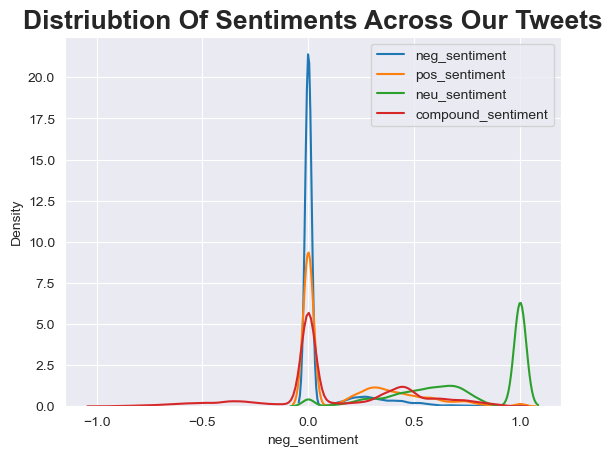

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.title('Distriubtion Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(tweet_df['neg_sentiment'],bw=0.1, label = 'neg_sentiment')
sns.kdeplot(tweet_df['pos_sentiment'],bw=0.1, label = 'pos_sentiment')
sns.kdeplot(tweet_df['neu_sentiment'],bw=0.1, label = 'neu_sentiment')
sns.kdeplot(tweet_df['compound_sentiment'],bw=0.1, label = 'compound_sentiment')
plt.legend(loc='upper right')
plt.show()

In [22]:
merged_df = tweet_df.merge(covid_df, on=['country', 'date'], how='left')
merged_df['date'] = pd.to_datetime(merged_df['date'], errors = 'coerce')
merged_df['user_created'] = pd.to_datetime(merged_df['user_created'], errors = 'coerce')
display(merged_df.sample(5))
merged_df.isna().sum()

user_name        user_location user_created       date  \
4642       3125                  NaN   2019-04-17 2021-01-26   
2519       1704                  NaN   2013-02-20 2021-01-06   
4060       2775    Alexandria, Egypt   2012-06-03 2021-01-19   
8796       5846                  NaN   2019-05-17 2021-06-20   
4756       3208  London and Hargeisa   2018-08-09 2021-01-27   

                                                   text  \
4642  Got my vaccination today! Feeling thankful for...   
2519  Vaccines Bring Hope For India, Now, There Need...   
4060  I got my 2nd shot of COVID vaccine this mornin...   
8796  I've just had my first dose of the #COVIDVacci...   
4756  Alhamdulilah, what a day! I just had the COVID...   

                                    hashtags  retweets  favorites        city  \
4642                                     NaN         0          4        None   
2519                            ['vaccines']         0          0        None   
4060                                     NaN         0          7  Alexandria   
8796  ['COVIDVaccination', 'PfizerBiontech']         0          8        None   
4756                      ['PfizerBioNTech']         1         19      London   

             country  ...                                        tweet_words  \
4642            None  ...  [today, feeling, thankful, work, gone, tiny, s...   
2519            None  ...     [bring, hope, india, needs, disclosures, read]   
4060           Egypt  ...  [shot, morning, step, closer, immunityfeel, gr...   
8796            None  ...             [first, dose, edition, remember, soon]   
4756  United Kingdom  ...  [alhamdulilah, whatdayjust, thanks, everyone, ...   

     compound_sentiment  neg_sentiment  pos_sentiment  neu_sentiment  \
4642             0.6369            0.0          0.464          0.536   
2519             0.4404            0.0          0.367          0.633   
4060             0.7506            0.0          0.561          0.439   
8796             0.0000            0.0          0.000          1.000   
4756             0.4404            0.0          0.367          0.633   

      cumulative_total_cases  daily_new_cases  active_cases  \
4642                     NaN              NaN           NaN   
2519                     NaN              NaN           NaN   
4060                158174.0            899.0       25384.0   
8796                     NaN              NaN           NaN   
4756                     NaN              NaN           NaN   

      cumulative_total_deaths  daily_new_deaths  
4642                      NaN               NaN  
2519                      NaN               NaN  
4060                   8696.0              58.0  
8796                      NaN               NaN  
4756                      NaN               NaN  

[5 rows x 21 columns]

user_name                     0
user_location              2270
user_created                  0
date                          0
text                          0
hashtags                   2582
retweets                      0
favorites                     0
city                       6701
country                    4417
clean_text                    0
tweet_words                   0
compound_sentiment            0
neg_sentiment                 0
pos_sentiment                 0
neu_sentiment                 0
cumulative_total_cases     7147
daily_new_cases            7147
active_cases               7255
cumulative_total_deaths    7147
daily_new_deaths           7162
dtype: int64

## 4. Exploratory Data Analysis (EDA)


#### 4.1 User Demographics
Created Time
    Followers
    Frequency by City and Country
#### 4.2 Sentiment Score Over time
#### 4.3 Sentiment Score VS Location
#### 4.4 

In [23]:
df = merged_df.copy()
post_covid_df = merged_df[merged_df['user_created']>=pd.Timestamp(datetime.date(2020, 3, 1))].copy()
pre_covid_df = merged_df[merged_df['user_created']<pd.Timestamp(datetime.date(2020, 3, 1))].copy()

<Figure size 1600x800 with 0 Axes>

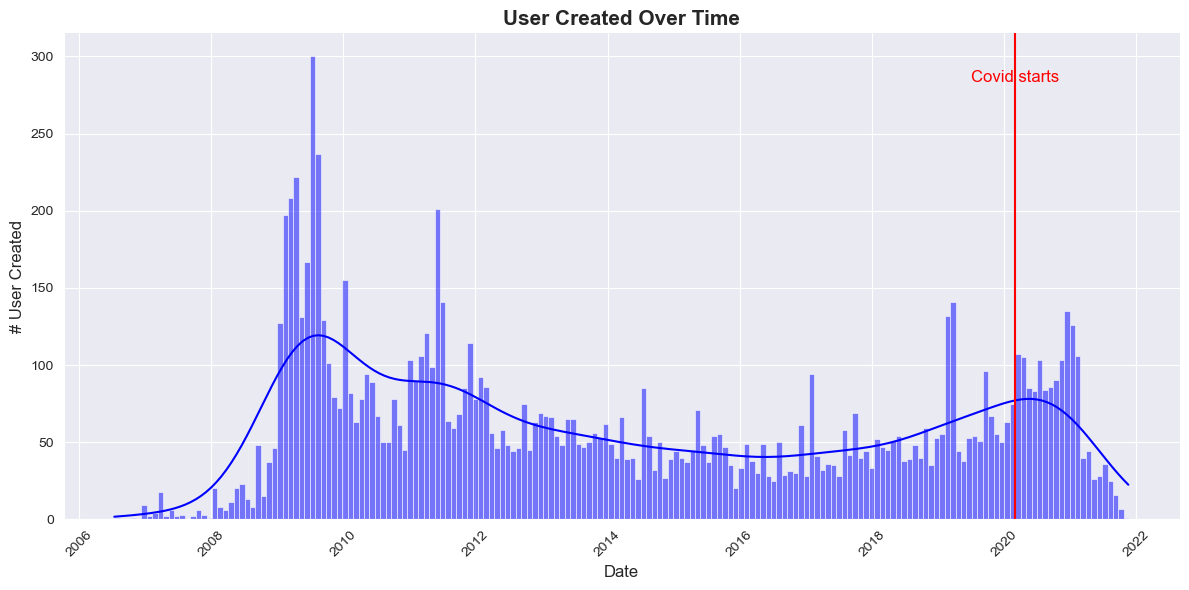

In [24]:
def plot_user_create_over_time(df):
    plt.figure(figsize=(16,8))
    sns.displot(df, x="user_created", kde=True, color='blue',height=6, aspect=2,binwidth=30)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('# User Created', fontsize=12)
    # plt.xlim([datetime.date(2019, 1, 1), datetime.date(2022, 1, 1)])
    plt.axvline(x=datetime.date(2020, 3, 1), color='red')
    plt.text(datetime.date(2020, 3, 1), plt.ylim()[1]*0.9, 'Covid starts', ha='center', color='red', fontsize=12) # Add the annotation
    plt.title('User Created Over Time', fontsize=15, fontweight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_user_create_over_time(df)

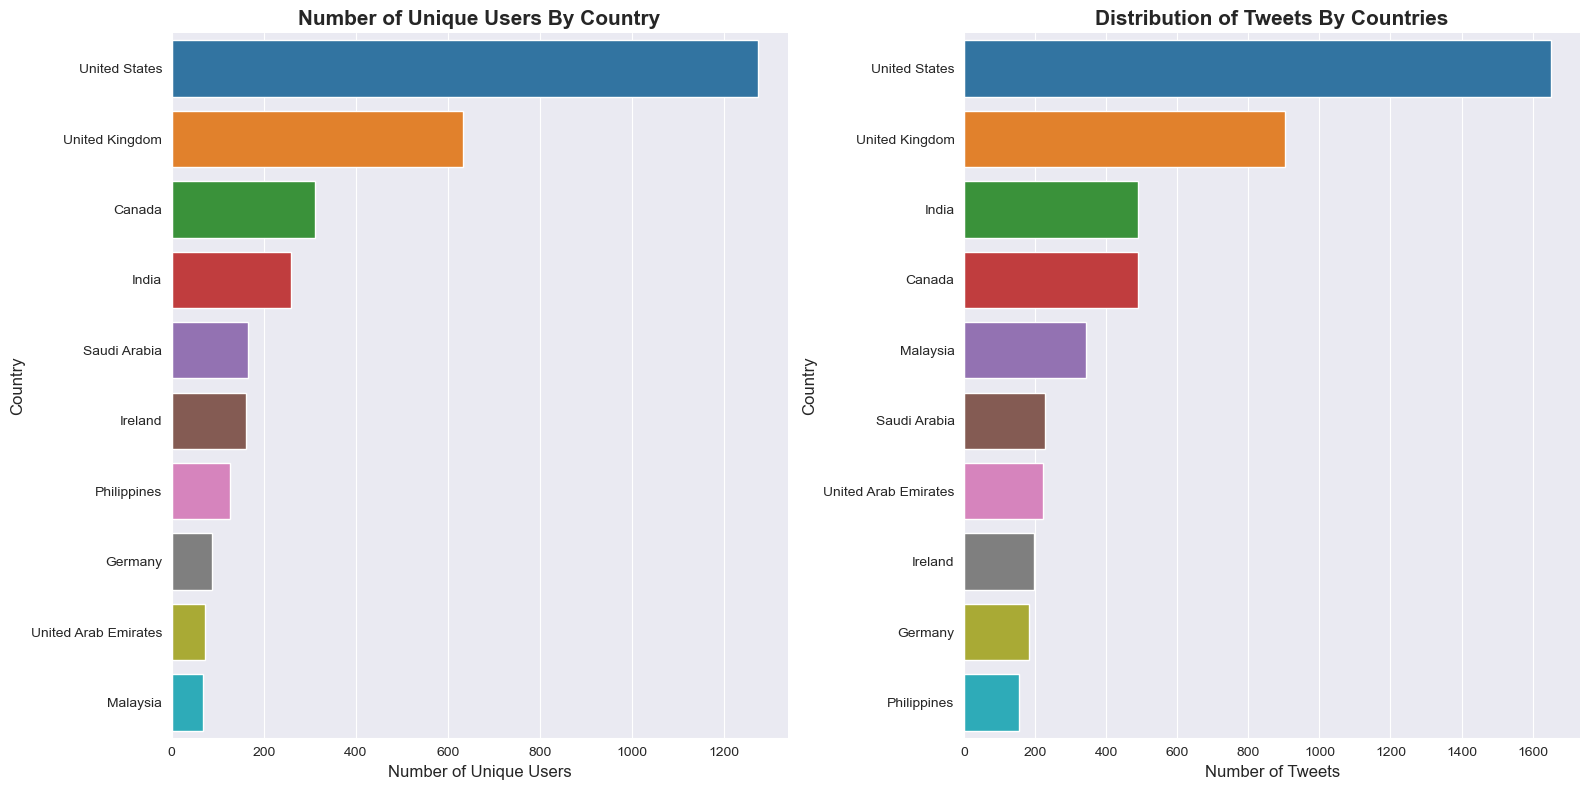

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first countplot in the first subplot
user_country = df[['user_name', 'country']].value_counts().reset_index()
top_10_countries =  user_country['country'].value_counts(sort=False).nlargest(10)
sns.countplot(y=user_country['country'], order=top_10_countries.index, orient='h', ax=axs[0])
axs[0].set_xlabel('Number of Unique Users', fontsize=12)
axs[0].set_ylabel('Country', fontsize=12)
axs[0].set_title("Number of Unique Users By Country", fontsize=15, fontweight='bold')

# Plot the second countplot in the second subplot
top_10_countries =  df['country'].value_counts(sort=False).nlargest(10)
sns.countplot(y=df['country'], order=top_10_countries.index, orient='h', ax=axs[1])
sns.despine() # Remove top and right spines
axs[1].set_xlabel('Number of Tweets', fontsize=12)
axs[1].set_ylabel('Country', fontsize=12)
axs[1].set_title('Distribution of Tweets By Countries', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()


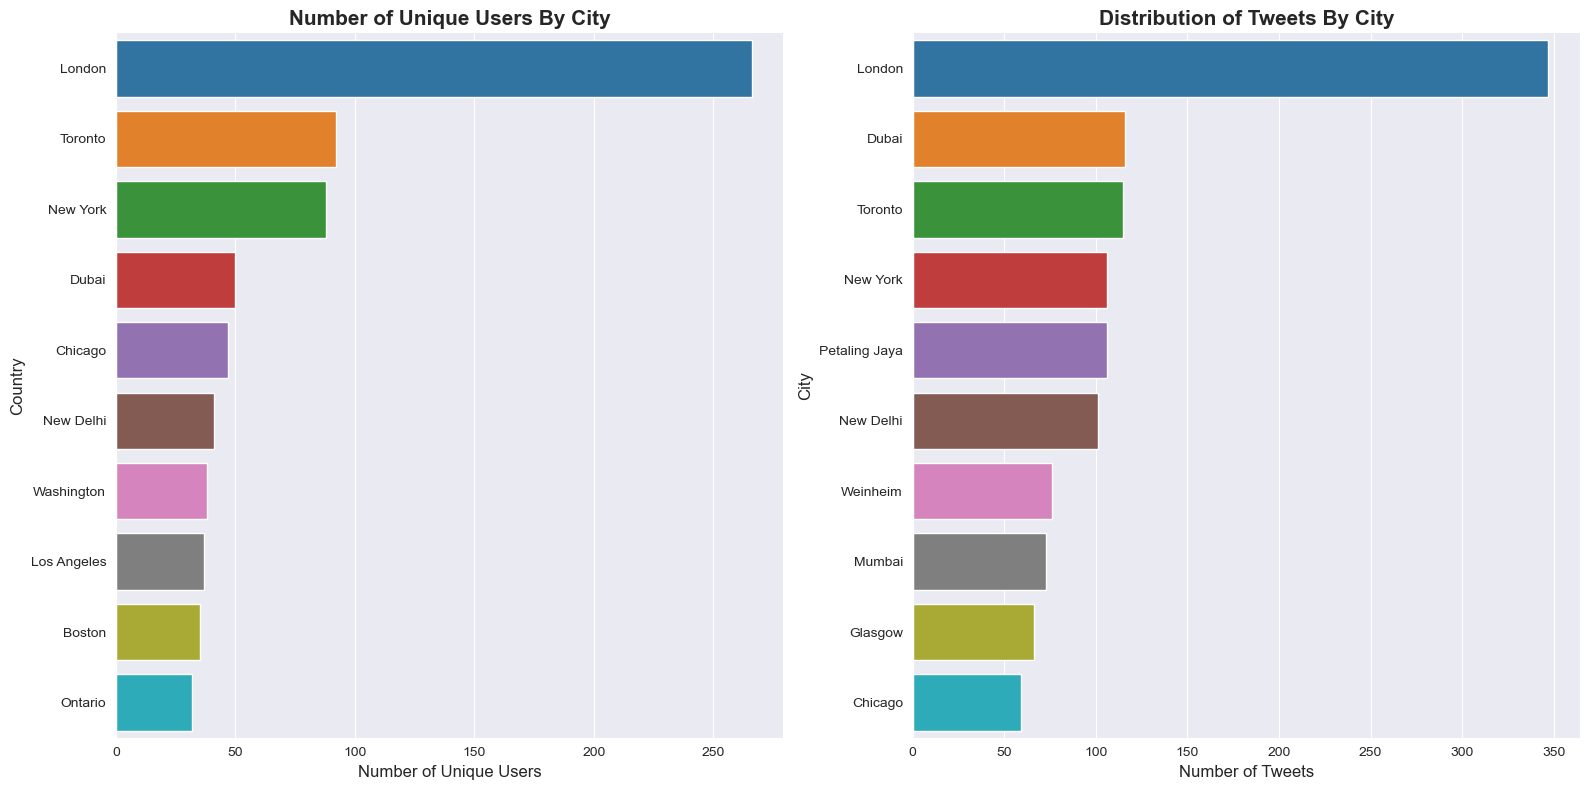

In [26]:
# Create a new figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first countplot in the first subplot
user_country = df[['user_name', 'city']].value_counts().reset_index()
top_10_countries =  user_country['city'].value_counts(sort=False).nlargest(10)
sns.countplot(y=user_country['city'], order=top_10_countries.index, orient='h', ax=axs[0])
axs[0].set_xlabel('Number of Unique Users', fontsize=12)
axs[0].set_ylabel('Country', fontsize=12)
axs[0].set_title("Number of Unique Users By City", fontsize=15, fontweight='bold')

# Plot the second countplot in the second subplot
top_10_countries =  df['city'].value_counts(sort=False).nlargest(10)
sns.countplot(y=df['city'], order=top_10_countries.index, orient='h', ax=axs[1])
sns.despine() # Remove top and right spines
axs[1].set_xlabel('Number of Tweets', fontsize=12)
axs[1].set_ylabel('City', fontsize=12)
axs[1].set_title('Distribution of Tweets By City', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

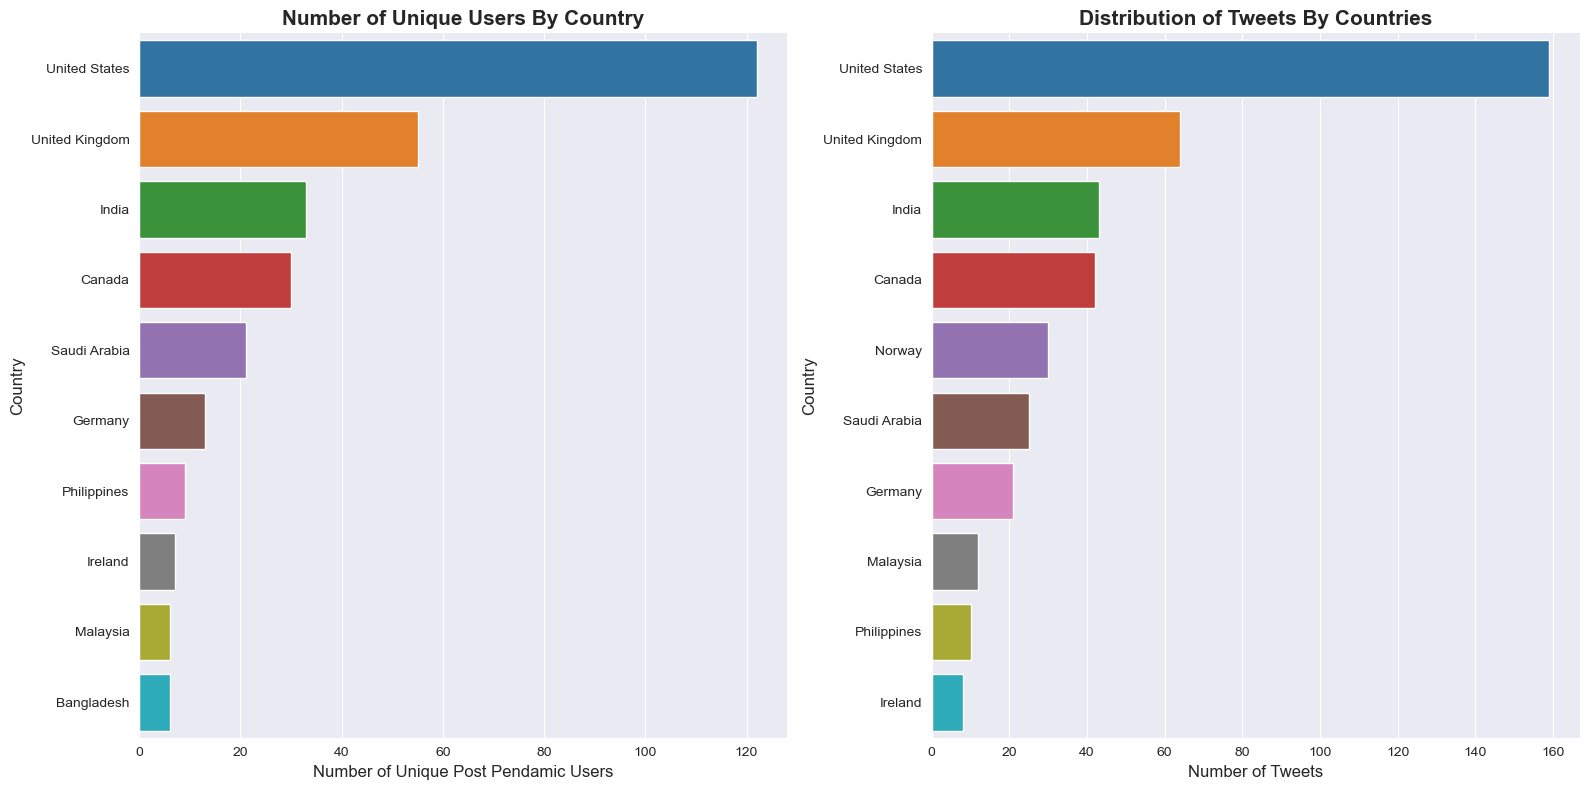

In [27]:
# Create a new figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first countplot in the first subplot
user_country = post_covid_df[['user_name', 'country']].value_counts().reset_index()
top_10_countries =  user_country['country'].value_counts(sort=False).nlargest(10)
sns.countplot(y=user_country['country'], order=top_10_countries.index, orient='h', ax=axs[0])
axs[0].set_xlabel('Number of Unique Post Pendamic Users', fontsize=12)
axs[0].set_ylabel('Country', fontsize=12)
axs[0].set_title("Number of Unique Users By Country", fontsize=15, fontweight='bold')

# Plot the second countplot in the second subplot
top_10_countries =  post_covid_df['country'].value_counts(sort=False).nlargest(10)
sns.countplot(y=post_covid_df['country'], order=top_10_countries.index, orient='h', ax=axs[1])
sns.despine() # Remove top and right spines
axs[1].set_xlabel('Number of Tweets', fontsize=12)
axs[1].set_ylabel('Country', fontsize=12)
axs[1].set_title('Distribution of Tweets By Countries', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()


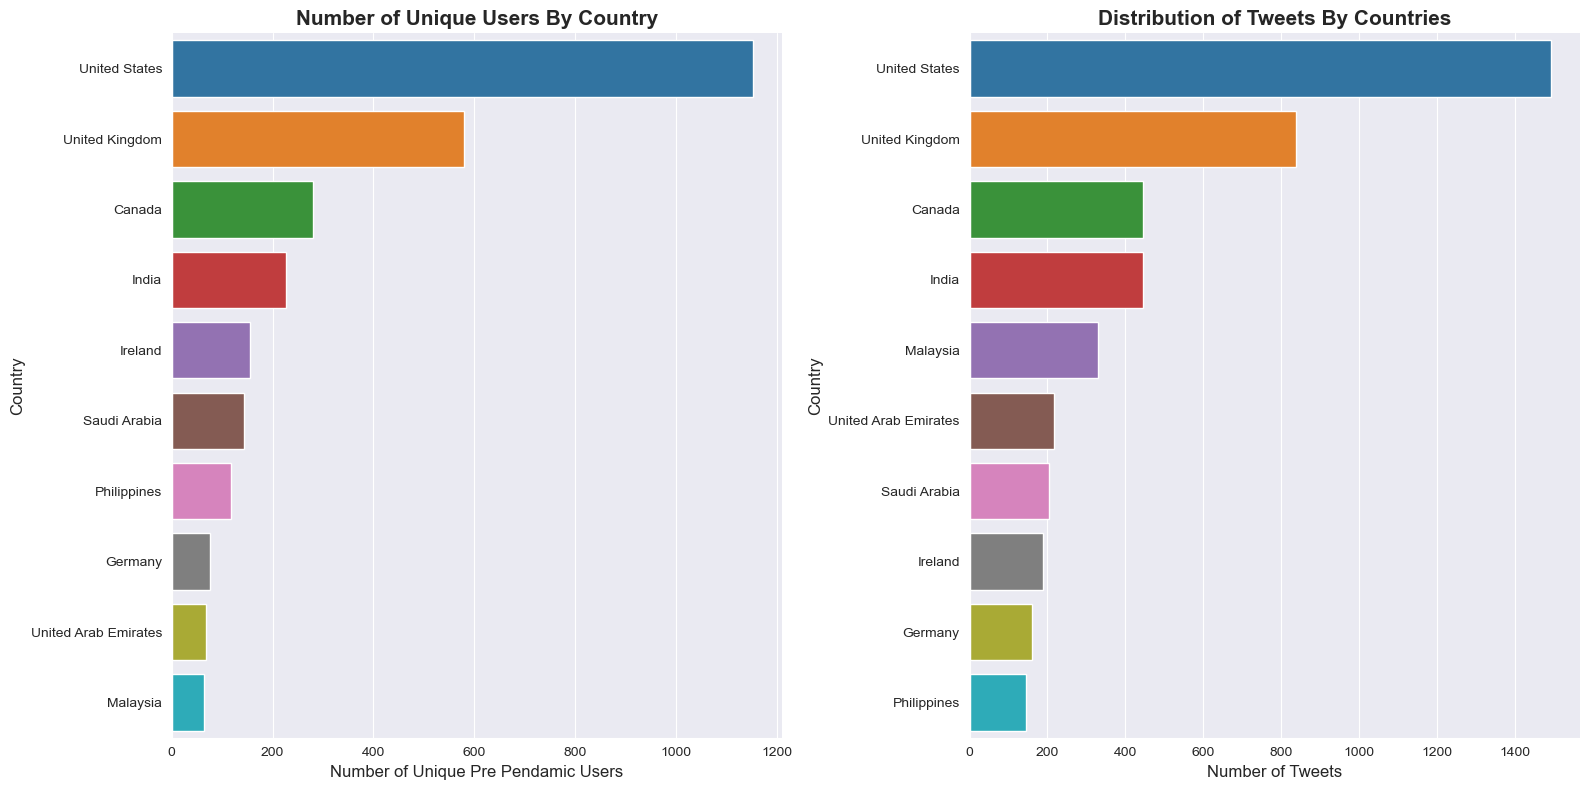

In [28]:
# pre_pandemic
# Convert the date to a pandas-compatible format


# Create a new figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first countplot in the first subplot
user_country = pre_covid_df[['user_name', 'country']].value_counts().reset_index()
top_10_countries =  user_country['country'].value_counts(sort=False).nlargest(10)
sns.countplot(y=user_country['country'], order=top_10_countries.index, orient='h', ax=axs[0])
axs[0].set_xlabel('Number of Unique Pre Pendamic Users', fontsize=12)
axs[0].set_ylabel('Country', fontsize=12)
axs[0].set_title("Number of Unique Users By Country", fontsize=15, fontweight='bold')

# Plot the second countplot in the second subplot
top_10_countries =  pre_covid_df['country'].value_counts(sort=False).nlargest(10)
sns.countplot(y=pre_covid_df['country'], order=top_10_countries.index, orient='h', ax=axs[1])
sns.despine() # Remove top and right spines
axs[1].set_xlabel('Number of Tweets', fontsize=12)
axs[1].set_ylabel('Country', fontsize=12)
axs[1].set_title('Distribution of Tweets By Countries', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

<Figure size 1600x2000 with 0 Axes>

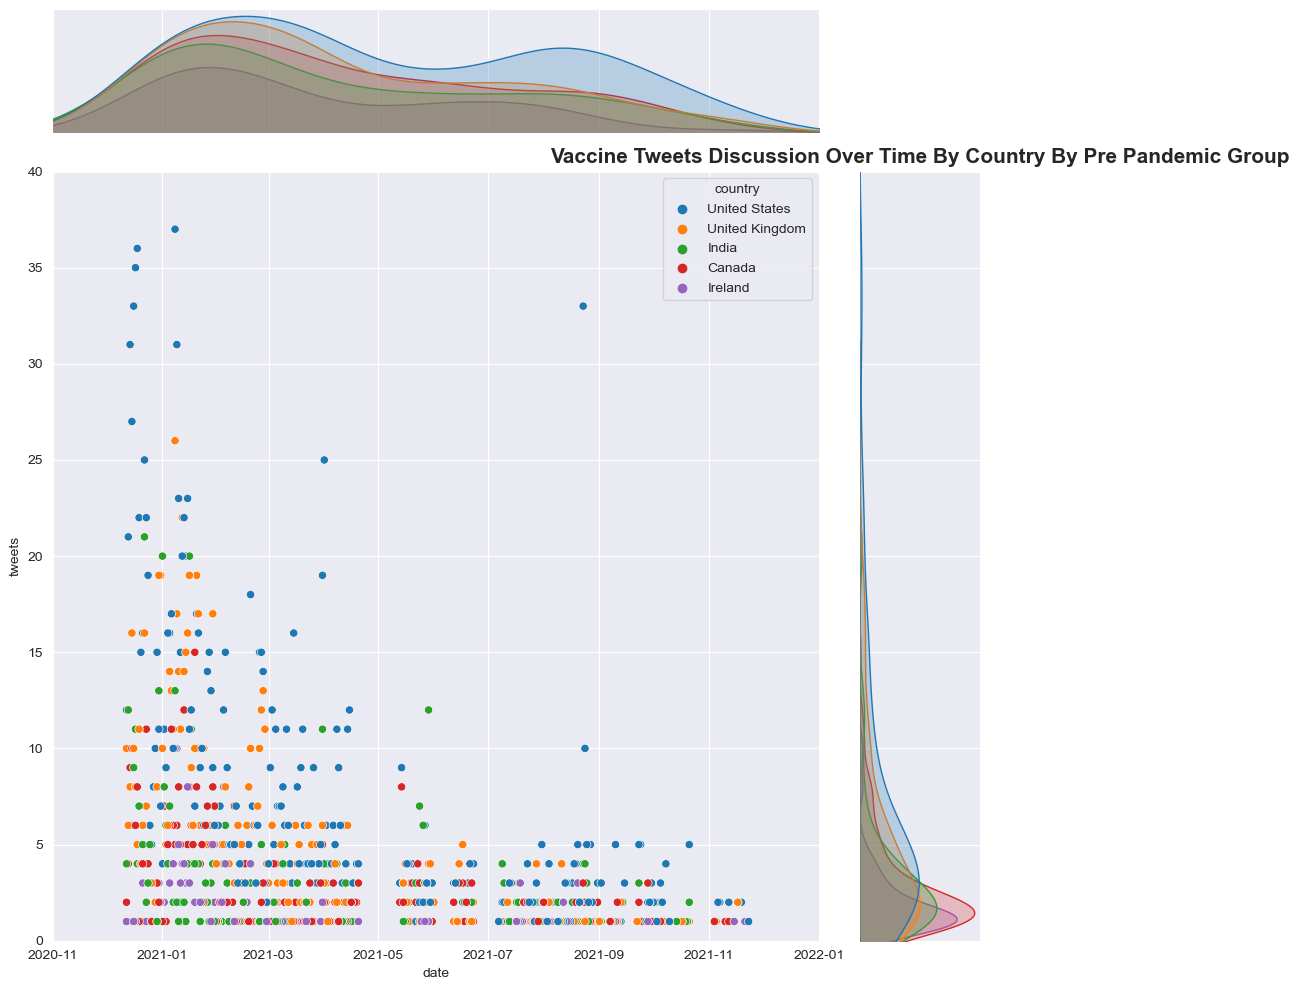

In [29]:
tweet_country = df[['date', 'country']].value_counts().reset_index(name='tweets')
top_5_countries =  user_country['country'].value_counts(sort=False).nlargest(5)
tweet_country = tweet_country[tweet_country['country'].isin(top_5_countries.index)]
# Make the joint plot
plt.figure(figsize=(16, 20))
sns.jointplot(x='date', y='tweets', data=tweet_country, 
              hue='country', height=10, 
              xlim = (datetime.date(2020, 11, 1), datetime.date(2022, 1, 1)), ylim=(0,40))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Vaccine Tweets Discussion Over Time By Country By Pre Pandemic Group', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

<Figure size 1600x2000 with 0 Axes>

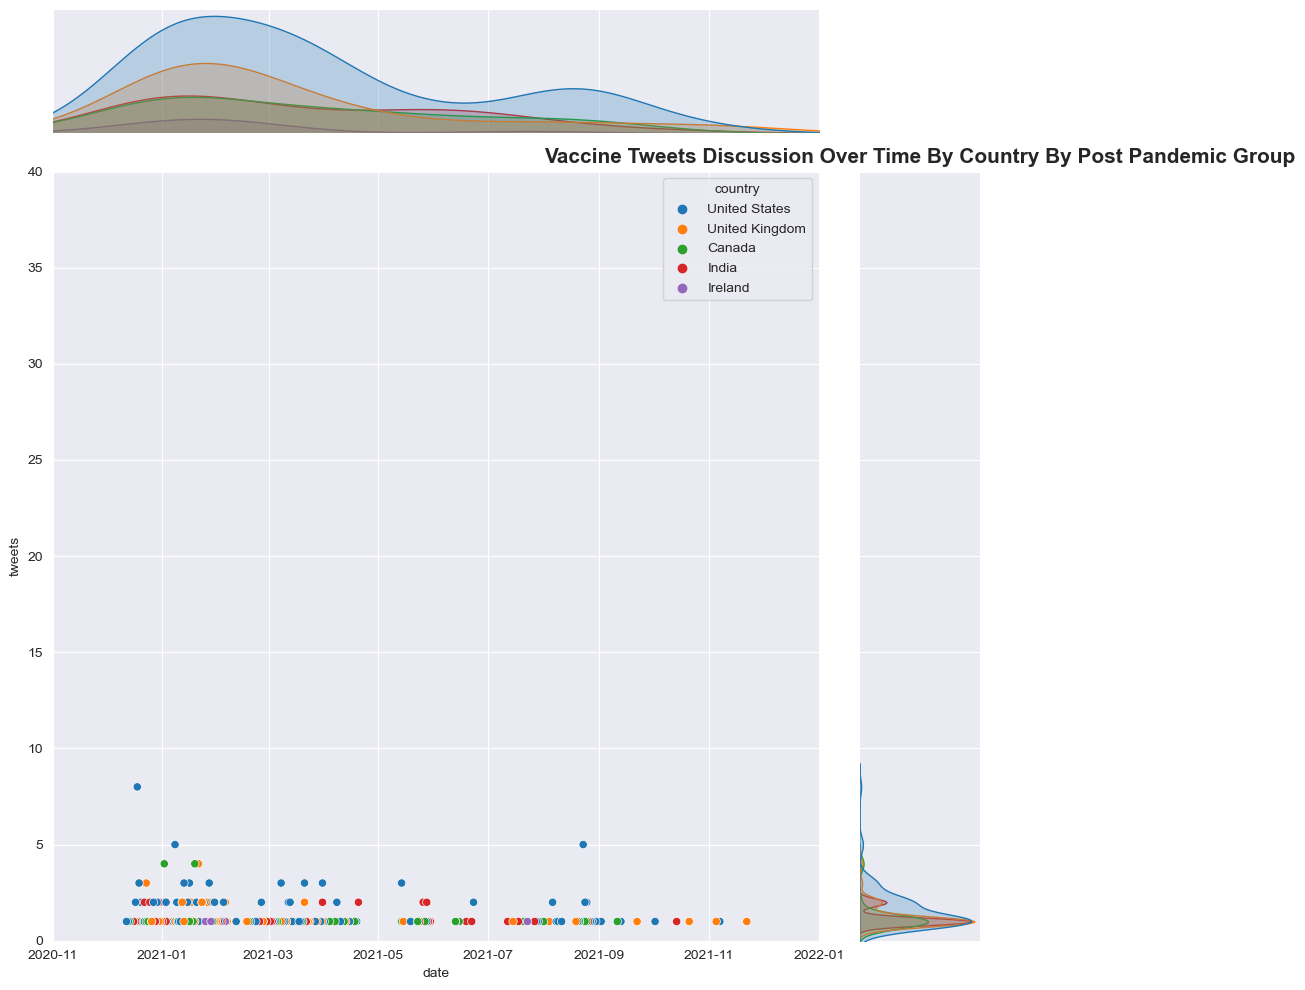

In [30]:
tweet_country = post_covid_df[['date', 'country']].value_counts().reset_index(name='tweets')
top_5_countries =  user_country['country'].value_counts(sort=False).nlargest(5)
tweet_country = tweet_country[tweet_country['country'].isin(top_5_countries.index)]
# Make the joint plot
plt.figure(figsize=(16, 20))
sns.jointplot(x='date', y='tweets', data=tweet_country, 
              hue='country', height=10, 
              xlim = (datetime.date(2020, 11, 1), datetime.date(2022, 1, 1)), ylim=(0,40))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Vaccine Tweets Discussion Over Time By Country By Post Pandemic Group', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

<Figure size 1600x2000 with 0 Axes>

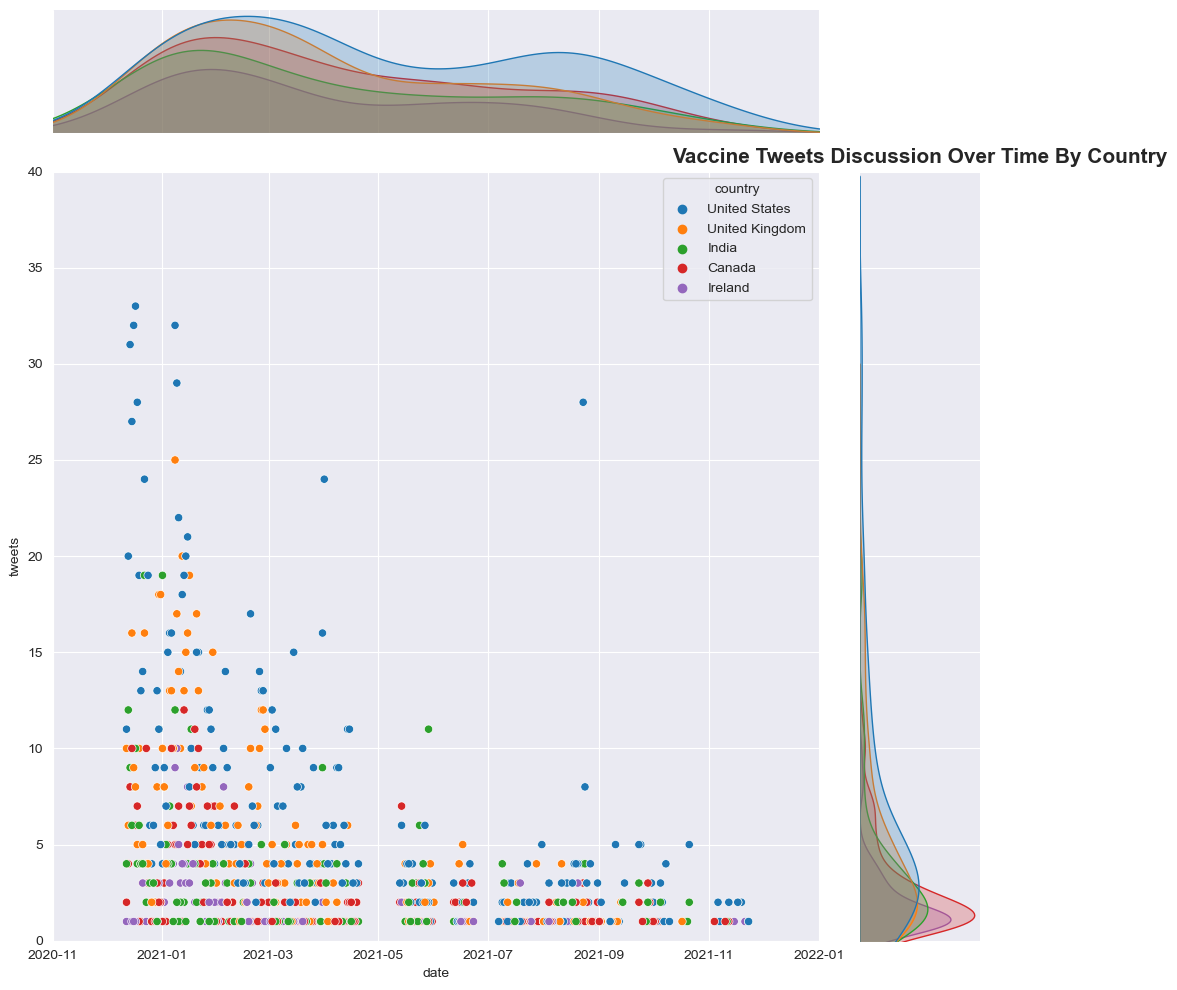

In [31]:
tweet_country = pre_covid_df[['date', 'country']].value_counts().reset_index(name='tweets')
top_5_countries =  user_country['country'].value_counts(sort=False).nlargest(5)
tweet_country = tweet_country[tweet_country['country'].isin(top_5_countries.index)]

# Make the joint plot
plt.figure(figsize=(16, 20))

sns.jointplot(x='date', y='tweets', data=tweet_country, 
              hue='country', height=10, 
              xlim = (datetime.date(2020, 11, 1), datetime.date(2022, 1, 1)), ylim=(0,40))

plt.xlabel('Date', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Vaccine Tweets Discussion Over Time By Country', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

Pfizer/BioNTech COVID-19 vaccine was distributed to 150 hospitals across the United States on December 14, 2020

COVID vaccine mandates in Los Angeles have been rolled out in different phases. On October 7, 2021, Los Angeles City Council passed one of the strictest coronavirus vaccine mandates in the United States, requiring proof of at least one dose of the COVID-19 vaccine beginning on October 7, and proof of full vaccination by November 4 for entry into indoor public spaces and businesses. Of the county's roughly 10 million residents, 78% had received at least one dose of the COVID-19 vaccine as of September 2021. Although enforcement of the mandate began on November 29, 2021, the mandate was later extended through January 15, 2022. 

In September 2021, New York City implemented a vaccine mandate for all public school employees. In September 2021, a vaccine mandate for hospital and nursing home workers was introduced. In February 2023, a judge blocked the state's COVID-19 vaccination mandate for healthcare facilities, although healthcare workers are still required to receive the COVID-19 vaccine. In November 2022, New York City's COVID-19 vaccine mandate covering private sector employees and customers ended. 

It is worth mentioning that the India only approved emergency use of the Pfizer vaccines, they were running other 9 vaccines. We will dig into what they were saying.

also why missing data and its impact on the curve

In [32]:
# checking sentiments

In [33]:
df = merged_df.copy()
pre_df=df[df['user_created']<pd.Timestamp(datetime.date(2020, 3, 1))]
post_df=df[df['user_created']>pd.Timestamp(datetime.date(2020, 3, 1))]

# extract year and month
df['year_month'] =  df['date'] + pd.offsets.Week(weekday=6)# df['date'].dt.strftime('%Y-%m')
pre_df['year_month'] = pre_df['date'] + pd.offsets.Week(weekday=6)# pre_df['date'].dt.strftime('%Y-%m')
post_df['year_month'] = post_df['date'] + pd.offsets.Week(weekday=6)# post_df['date'].dt.strftime('%Y-%m')

# group by year month
df = df.groupby(["year_month","country"]).mean().reset_index()
pre_df = pre_df.groupby(["year_month","country"]).mean().reset_index()
post_df = post_df.groupby(["year_month","country"]).mean().reset_index()

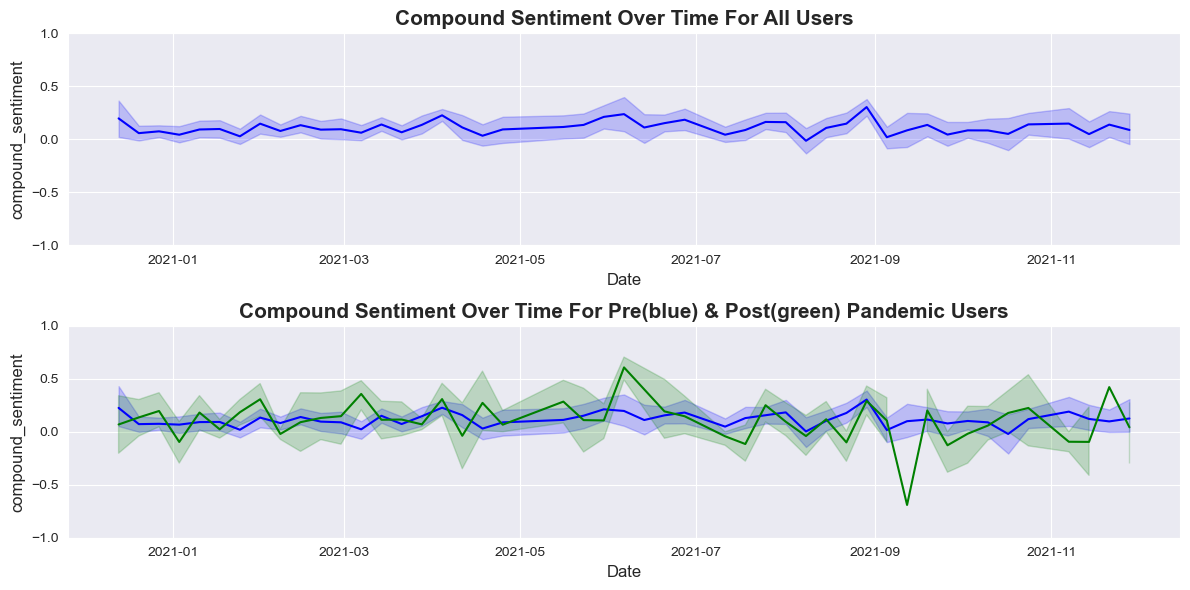

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

sns.lineplot(x='year_month', y='compound_sentiment', data=df, color='blue', ax=axes[0])
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('compound_sentiment', fontsize=12)
axes[0].set_ylim([-1, 1])
axes[0].set_title('Compound Sentiment Over Time For All Users', fontsize=15, fontweight='bold')


sns.lineplot(x='year_month', y='compound_sentiment', data=pre_df, color='blue', ax=axes[1])
sns.lineplot(x='year_month', y='compound_sentiment', data=post_df, color='green', ax=axes[1])
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('compound_sentiment', fontsize=12)
axes[1].set_ylim([-1, 1])
axes[1].set_title('Compound Sentiment Over Time For Pre(blue) & Post(green) Pandemic Users', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()


In [35]:
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# sns.lineplot(x='year_month', y='pos_sentiment', data=df, color='blue', ax=axes[0])
# axes[0].set_xlabel('Date', fontsize=12)
# axes[0].set_ylabel('pos_sentiment', fontsize=12)
# axes[0].set_ylim([0, 1])
# axes[0].set_title('Positive Sentiment Over Time For All Users', fontsize=15, fontweight='bold')

# sns.lineplot(x='year_month', y='pos_sentiment', data=pre_df, color='blue', ax=axes[1])
# sns.lineplot(x='year_month', y='pos_sentiment', data=post_df, color='green', ax=axes[1])
# axes[1].set_xlabel('Date', fontsize=12)
# axes[1].set_ylabel('pos_sentiment', fontsize=12)
# axes[1].set_ylim([0, 1])
# axes[1].set_title('Positive Sentiment Over Time For Pre(blue) & Post(green) Pandemic Users', fontsize=15, fontweight='bold')

# plt.tight_layout()
# plt.show()

In [36]:
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# sns.lineplot(x='year_month', y='neg_sentiment', data=df, color='blue', ax=axes[0])
# axes[0].set_xlabel('Date', fontsize=12)
# axes[0].set_ylabel('neg_sentiment', fontsize=12)
# axes[0].set_ylim([0, 1])
# axes[0].set_title('Negative Sentiment Over Time For All Users', fontsize=15, fontweight='bold')

# sns.lineplot(x='year_month', y='neg_sentiment', data=pre_df, color='blue', ax=axes[1])
# sns.lineplot(x='year_month', y='neg_sentiment', data=post_df, color='green', ax=axes[1])
# axes[1].set_xlabel('Date', fontsize=12)
# axes[1].set_ylabel('neg_sentiment', fontsize=12)
# axes[1].set_ylim([0, 1])
# axes[1].set_title('Negative Sentiment Over Time For Pre(blue) & Post(green) Pandemic Users', fontsize=15, fontweight='bold')

# plt.tight_layout()
# plt.show()

In [37]:
# for compound snetiment score, the trend started to gain more volatility after 2021-07
# we can also observe this in the negaive sentiment score chart, the peak in 2021-10 is due to less amount of data and thus we consider it outliers
# the positive sentiment score seems more violent after 2021-9, probablit due to less data collected

In [38]:
df = merged_df.copy()
df['user_type'] = df['user_created'].apply(lambda x: "Pre Pandemic" if x<pd.Timestamp(datetime.date(2020, 3, 1)) else "Post Pandemic")

# extract year and month
df['year_month'] =  df['date'] + pd.offsets.Week(weekday=6)

# get the countruies with most tweets
top_4_countries =  df['country'].value_counts(sort=False).nlargest(4)

# sub set the data
top_4_df = df[df['country'].isin(top_4_countries.index)]

# group by year month
top_4_df = top_4_df.groupby(["year_month","country","user_type"]).mean().reset_index()

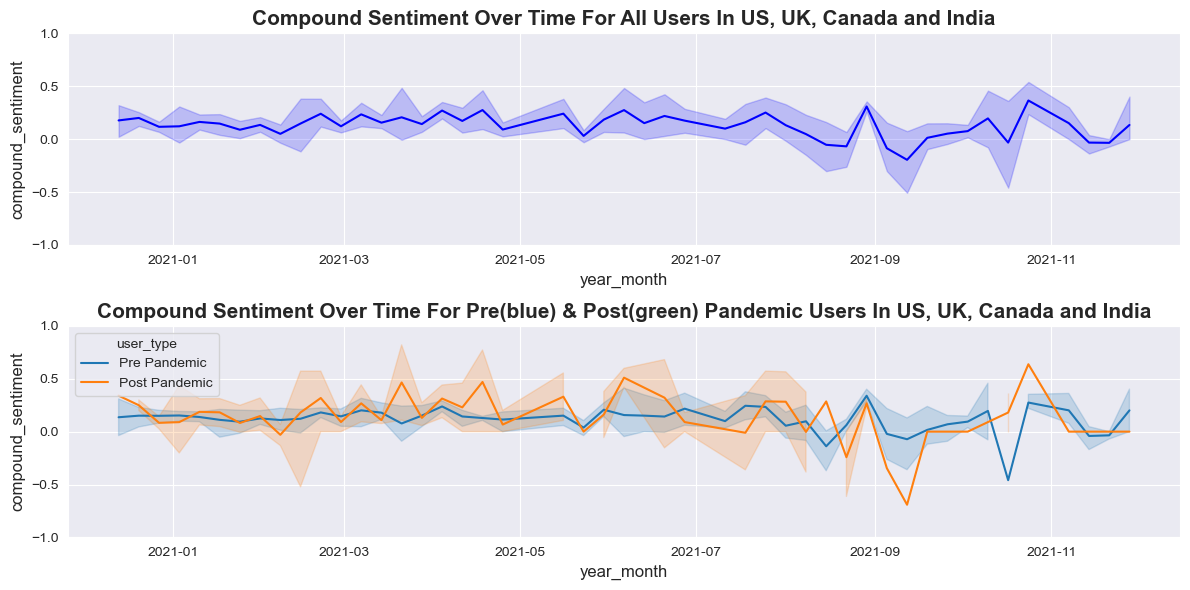

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

sns.lineplot(x='year_month', y='compound_sentiment', data=top_4_df, color='blue', ax=axes[0])
axes[0].set_xlabel('year_month', fontsize=12)
axes[0].set_ylabel('compound_sentiment', fontsize=12)
axes[0].set_ylim([-1, 1])
axes[0].set_title('Compound Sentiment Over Time For All Users In US, UK, Canada and India', fontsize=15, fontweight='bold')

# sns.lineplot(x='year_month', y='compound_sentiment', data=top_4_pre_df, color='blue', ax=axes[1])
# sns.lineplot(x='year_month', y='compound_sentiment', data=top_4_post_df, color='green', ax=axes[1])
sns.lineplot(x='year_month', y='compound_sentiment', data=top_4_df, hue='user_type', ax=axes[1])
axes[1].set_xlabel('year_month', fontsize=12)
axes[1].set_ylabel('compound_sentiment', fontsize=12)
axes[1].set_ylim([-1, 1])
axes[1].set_title('Compound Sentiment Over Time For Pre(blue) & Post(green) Pandemic Users In US, UK, Canada and India', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

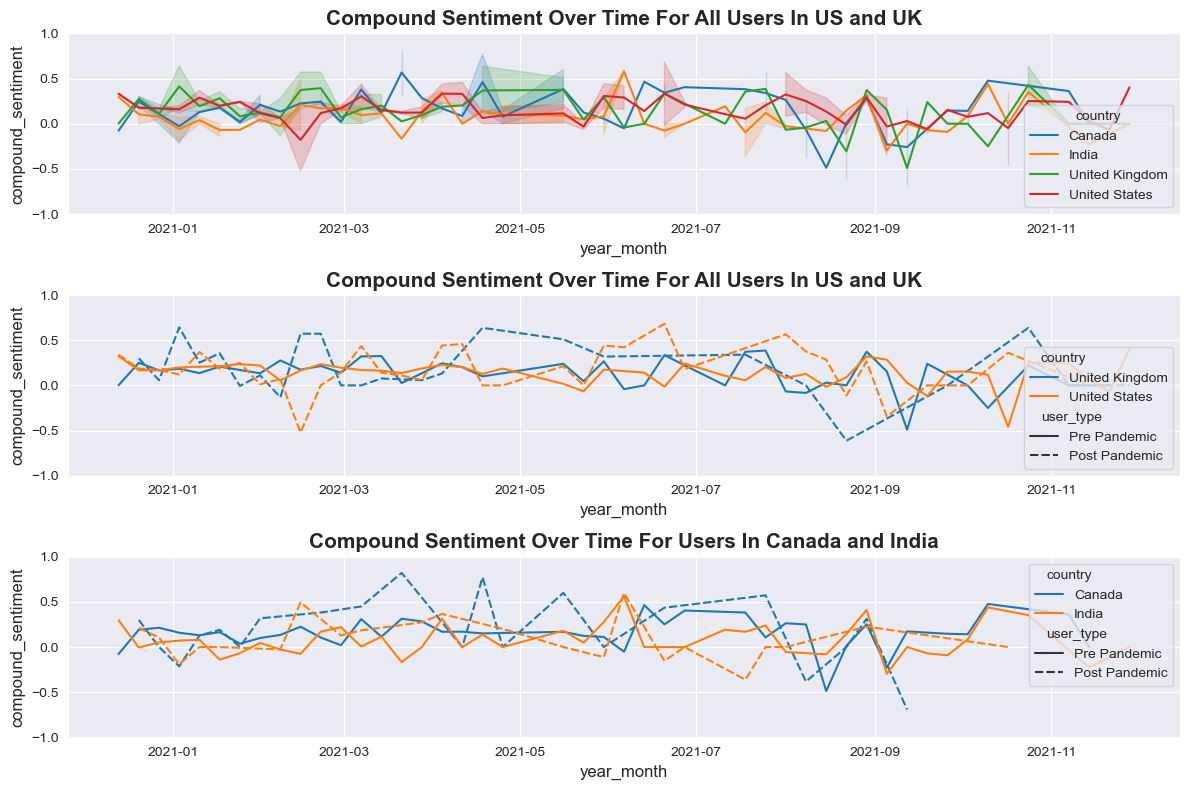

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))

sns.lineplot(x='year_month', y='compound_sentiment', data=top_4_df[top_4_df.country.isin(["United Kingdom","United States","Canada","India"])], hue='country', ax=axes[0])
axes[0].set_xlabel('year_month', fontsize=12)
axes[0].set_ylabel('compound_sentiment', fontsize=12)
axes[0].set_ylim([-1, 1])
axes[0].set_title('Compound Sentiment Over Time For All Users In US and UK', fontsize=15, fontweight='bold')

sns.lineplot(x='year_month', y='compound_sentiment', data=top_4_df[top_4_df.country.isin(["United Kingdom","United States"])], hue='country', style ="user_type", ax=axes[1])
axes[1].set_xlabel('year_month', fontsize=12)
axes[1].set_ylabel('compound_sentiment', fontsize=12)
axes[1].set_ylim([-1, 1])
axes[1].set_title('Compound Sentiment Over Time For All Users In US and UK', fontsize=15, fontweight='bold')

sns.lineplot(x='year_month', y='compound_sentiment', data=top_4_df[top_4_df.country.isin(["Canada","India"])], hue='country', style ="user_type", ax=axes[2])
axes[2].set_xlabel('year_month', fontsize=12)
axes[2].set_ylabel('compound_sentiment', fontsize=12)
axes[2].set_ylim([-1, 1])
axes[2].set_title('Compound Sentiment Over Time For Users In Canada and India', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

In [41]:
# is there a difference between US and other countries?


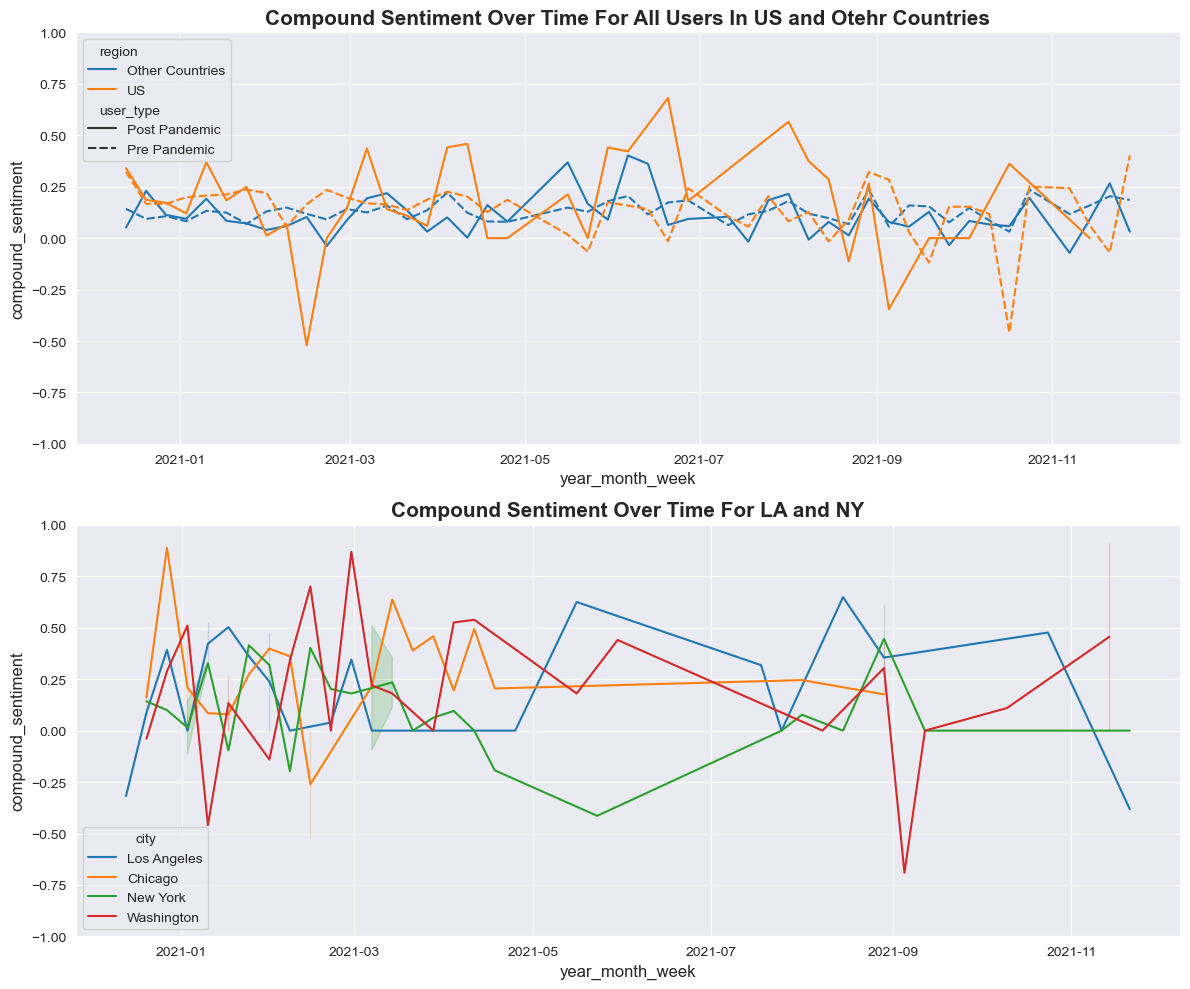

In [42]:


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

df = merged_df.copy()
df['user_type'] = df['user_created'].apply(lambda x: "Pre Pandemic" if x<pd.Timestamp(datetime.date(2020, 3, 1)) else "Post Pandemic")
df['region'] = df['country'].apply(lambda x: "US" if x=="United States" else "Other Countries")
# extract year and month
df['year_month_week'] =  df['date'] + pd.offsets.Week(weekday=6)
# group by year month
df = df.groupby(["year_month_week","region","user_type"]).mean().reset_index()

sns.lineplot(x='year_month_week', y='compound_sentiment', data=df, hue='region', style ="user_type", ax=axes[0])
axes[0].set_xlabel('year_month_week', fontsize=12)
axes[0].set_ylabel('compound_sentiment', fontsize=12)
axes[0].set_ylim([-1, 1])
axes[0].set_title('Compound Sentiment Over Time For All Users In US and Otehr Countries', fontsize=15, fontweight='bold')


df = merged_df.copy()
df['user_type'] = df['user_created'].apply(lambda x: "Pre Pandemic" if x<pd.Timestamp(datetime.date(2020, 3, 1)) else "Post Pandemic")
df['region'] = df['country'].apply(lambda x: "US" if x=="United States" else "Other Countries")
# extract year and month
df['year_month_week'] =  df['date'] + pd.offsets.Week(weekday=6)
# group by year month
df = df.groupby(["year_month_week","city","user_type"]).mean().reset_index()

sns.lineplot(x='year_month_week', y='compound_sentiment', data=df[df.city.isin(['New York', 'Los Angeles',"Chicago","Washington"])], hue='city', ax=axes[1])
axes[1].set_xlabel('year_month_week', fontsize=12)
axes[1].set_ylabel('compound_sentiment', fontsize=12)
axes[1].set_ylim([-1, 1])
axes[1].set_title('Compound Sentiment Over Time For LA and NY', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

#### Sentiment Score vs location

In [43]:
# import plotly.express as px

# df = merged_df.copy()
# df = df[['date','country', 'compound_sentiment','neg_sentiment','pos_sentiment', 'neu_sentiment']].dropna()
# df = df.groupby(['country','date']).mean().reset_index()

# # df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

# start_date = df['date'].min()
# end_date = df['date'].max()


# fill_df = []
# for name, group in df.groupby('country'):
#     group.set_index('date', inplace=True)
#     reindexed = group.reindex(pd.date_range(start=start_date, end=end_date, freq='D'))
#     reindexed['country'].fillna(name, inplace=True)
#     reindexed.fillna(0, inplace=True)
    
#     fill_df.append(reindexed.reset_index())

# df = pd.concat(fill_df).rename(columns={'index':'date'})
# df['date'] = df['date'].astype(str)
# pos_df = df.copy()


# top_10_countries =  merged_df['country'].value_counts(sort=False).nlargest(10)
# df = df[(df['country'].isin(top_10_countries.index))].fillna(0)

# # Change in pos_sentiment over time for different countries
# fig = px.bar(df,
#              y = "country",
#              x = 'pos_sentiment',
#              animation_frame= 'date',
#              range_x = [0,1],
#              color='country'
# )
# fig.show()

In [44]:
# import plotly.express as px

# df = covid_df.copy()
# top_10_countries =  merged_df['country'].value_counts(sort=False).nlargest(10)
# df = df[(df['country'].isin(top_10_countries.index))].fillna(0)
# # maybe group by week is better


# fig = px.bar(df,
#              y = "country",
#              x = 'cumulative_total_cases',
#              animation_frame= 'date',
#              range_x = [0,50000000],
#              color='country'
# )
# fig.show()

In [45]:
# # !pip install plotly-express Viridis_r
# df = covid_df.copy()
# fig = px.choropleth(df,
#                     locations="country",
#                     color="cumulative_total_cases",
#                     hover_name="country",
#                     animation_frame="date",
#                     locationmode='country names',
#                     color_continuous_scale='Viridis_r',
#                     range_color=(1000, 2000000),
#                     height=600
#                     )
# fig.show()

In [46]:
# # Change in pos_sentiment over time for different countries
# df = pos_df.copy()
# fig = px.choropleth(df,
#                     locations="country",
#                     color="pos_sentiment",
#                     hover_name="country",
#                     animation_frame="date",
#                     locationmode='country names',
#                     color_continuous_scale='Viridis_r',
#                     range_color=(0,1),
#                     height=600
#                     )
# fig.show()

#### What are people talking about covid vaccines when they talk about it?

Few interesting Time Points:
* Global Scale: high volatility in 2021-02, negative sentiment for post in 2021-09, pre in 2021-10
* Country Scale: high volatility from 2021-01 to 2021-03 (espacially US and UK post),  2021-09 all negative (big 4)
* Vaccine Released to 150 hospitals in Dec 14 2020 in the US
* 

In [47]:
from wordcloud import WordCloud
def showWordCloud(df):
    # now put every word from every tweet into a single variable
    all_text = ' '.join(df['clean_text'])
    # create the word cloud
    wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white").generate(all_text)

    # Display the WordCloud                    
    plt.figure(figsize=(8,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

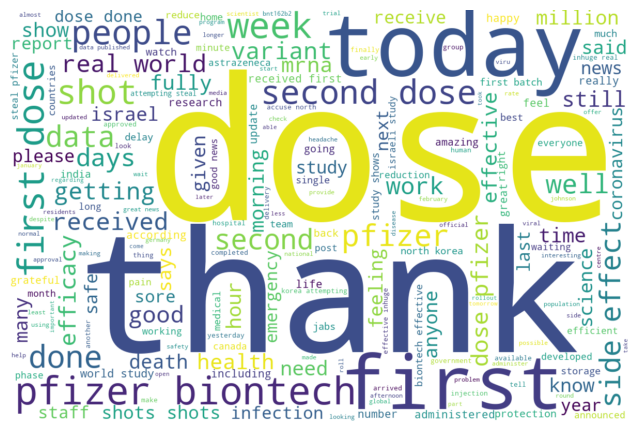

In [48]:
# Global Scale: high volatility in 2021-02
df_temp = merged_df [(merged_df["date"]<pd.Timestamp(datetime.date(2021, 3, 1)))&(merged_df["date"]>=pd.Timestamp(datetime.date(2021, 2, 1)))]
showWordCloud(df_temp)

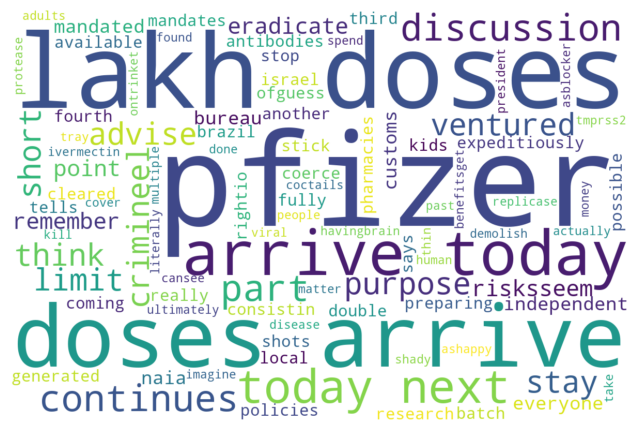

In [49]:
# Global Scale: negative sentiment for post in 2021-09
df_temp = merged_df [(merged_df["date"]<pd.Timestamp(datetime.date(2021, 9, 15)))
                     &(merged_df["date"]>=pd.Timestamp(datetime.date(2021, 9, 1)))
                     &(merged_df['user_created']>pd.Timestamp(datetime.date(2020, 3, 1)))
                     &(merged_df['compound_sentiment']<0.25)]
showWordCloud(df_temp)

In [50]:
# poeple starts to complian about policies and mandates

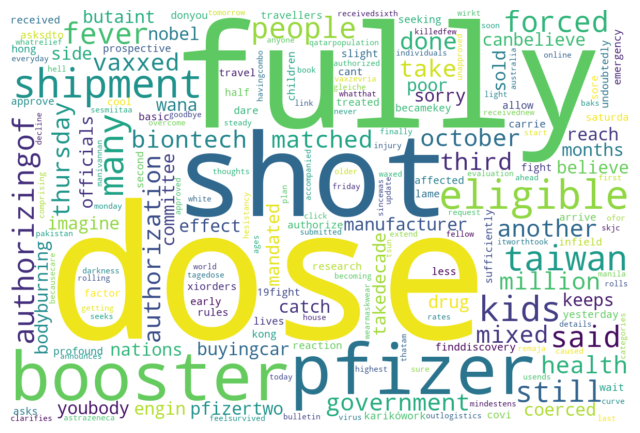

In [51]:
# Global Scale: negative sentiment for  pre in 2021-10
df_temp = merged_df [(merged_df["date"]<pd.Timestamp(datetime.date(2021, 10, 21)))
                     &(merged_df["date"]>=pd.Timestamp(datetime.date(2021, 10, 7)))
                     &(merged_df['user_created']<pd.Timestamp(datetime.date(2020, 3, 1)))
                     &(merged_df['compound_sentiment']<0.25)]
showWordCloud(df_temp)

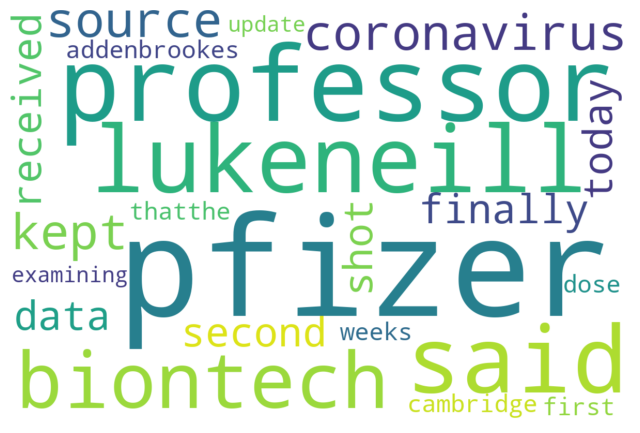

In [52]:
# high volatility from 2021-02 (espacially US and UK post)
df_temp = merged_df [(merged_df["date"]<pd.Timestamp(datetime.date(2021, 3, 1)))
                     &(merged_df["date"]>=pd.Timestamp(datetime.date(2021, 2, 15)))
                     &(merged_df['user_created']>pd.Timestamp(datetime.date(2020, 3, 1)))
                     &(merged_df['compound_sentiment']<0.25)
                     &(merged_df['country'].isin(["United Kingdom","United States"]))]
showWordCloud(df_temp)

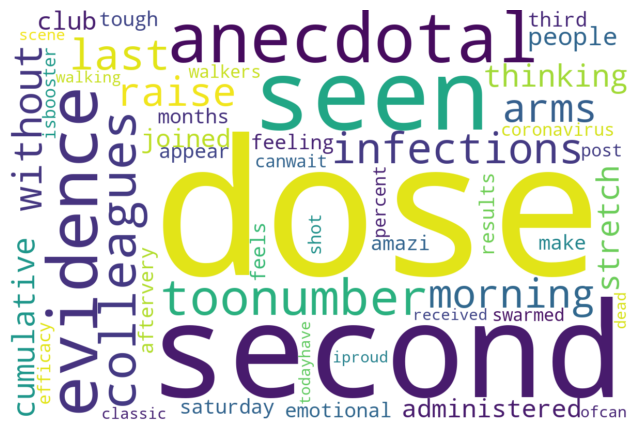

In [53]:
# high volatility from 2021-03 (espacially US and UK post),  2021-09 all negative (big 4)
df_temp = merged_df [(merged_df["date"]<pd.Timestamp(datetime.date(2021, 3, 15)))
                     &(merged_df["date"]>=pd.Timestamp(datetime.date(2021, 3, 1)))
                     &(merged_df['user_created']>pd.Timestamp(datetime.date(2020, 3, 1)))
                     &(merged_df['compound_sentiment']<0.25)
                     &(merged_df['country'].isin(["United Kingdom","United States"]))]
showWordCloud(df_temp)

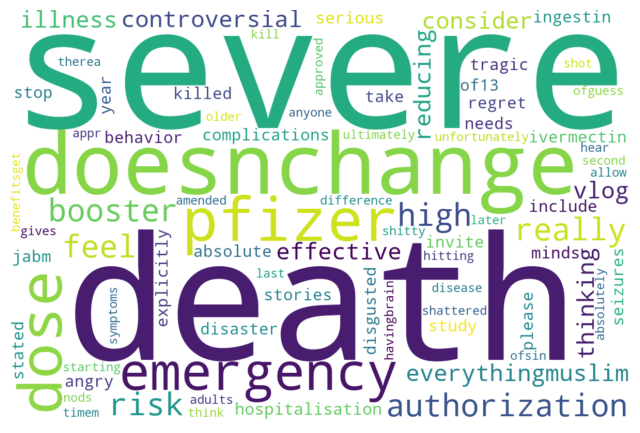

In [54]:
# high volatility from   2021-09 all negative (big 4)
df_temp = merged_df [(merged_df["date"]<pd.Timestamp(datetime.date(2021, 10, 1)))
                     &(merged_df["date"]>=pd.Timestamp(datetime.date(2021, 9, 1)))
#                      &(merged_df['user_created']>pd.Timestamp(datetime.date(2020, 3, 1)))
                     &(merged_df['compound_sentiment']<0)
                     &(merged_df['country'].isin(["United Kingdom","United States","Canada","India"]))]
showWordCloud(df_temp)

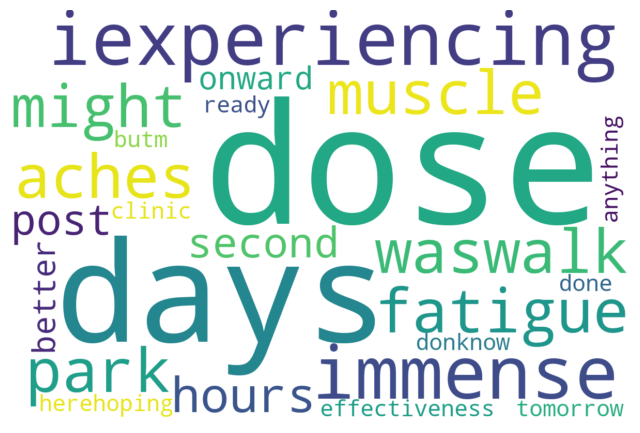

In [55]:
# negative sentiment from washington  from   2021-09 all negative (big 4)
df_temp = merged_df [(merged_df["date"]<pd.Timestamp(datetime.date(2021, 1, 15)))
                     &(merged_df["date"]>=pd.Timestamp(datetime.date(2021, 1, 1)))
#                      &(merged_df['user_created']>pd.Timestamp(datetime.date(2020, 3, 1)))
                     &(merged_df['compound_sentiment']<1)
                     &(merged_df['city'].isin(["Washington"]))]
showWordCloud(df_temp)

In [56]:
# negative sentiment from washington  from   2021-09

# df_temp = merged_df [(merged_df["date"]<pd.Timestamp(datetime.date(2021, 9, 15)))
#                      &(merged_df["date"]>=pd.Timestamp(datetime.date(2021, 9, 1)))
# #                      &(merged_df['user_created']>pd.Timestamp(datetime.date(2020, 3, 1)))
#                      &(merged_df['compound_sentiment']<1)
#                      &(merged_df['city'].isin(["Washington"]))]
# showWordCloud(df_temp)

# this shows a lack of data, uncomment the cell above to see

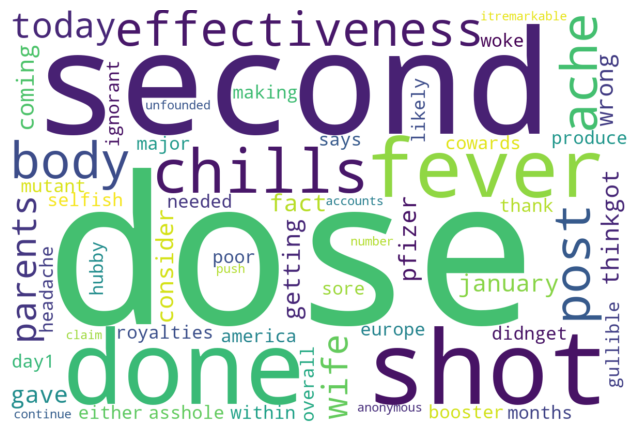

In [57]:
# negative sentiment from NYC  from   2021-09 all negative (big 4)
df_temp = merged_df [(merged_df["date"]<pd.Timestamp(datetime.date(2021, 8, 1)))
                     &(merged_df["date"]>=pd.Timestamp(datetime.date(2021, 4, 1)))
#                      &(merged_df['user_created']>pd.Timestamp(datetime.date(2020, 3, 1)))
                     &(merged_df['compound_sentiment']<0.25)
                     &(merged_df['city'].isin(["New York"]))]
showWordCloud(df_temp)

In [58]:
# people are complaining baout side affects and also shaming people who choose not to get vaccines.

## 6. Correlation Analysis

### Introduction

### Introduction

### Introduction

### Introduction

### Introduction

### Introduction

### Introduction